In [1]:
import tensorflow as tf
from tensorflow import keras 
import os 
import pandas as pd
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import *
from tensorflow.keras import layers

read the files under /image direcory and sort by the time value.

In [2]:
images_name= os.listdir("./images")

rename=lambda x : (int)(x.replace('prb-heat-map-','').split('-')[0])+ (int)(x.replace('prb-heat-map-','').split('-')[1].replace('.png',''))/10
modified_name=[rename(x) for x in images_name]

data= pd .DataFrame()
data["FileName"]= images_name
data["SequenceNumber"]= modified_name
data=data.sort_values(by=["SequenceNumber"]).reset_index(drop=True)
data["Good"]=1 # to track the goodness of the image or to idnetify if there is error reading the image

Generate sample gif file

In [3]:
# imgs = (Image.open("./images/"+f) for f in data.FileName[:25])
# img = next(imgs)  # extract first image from iterator
# img.save(fp='images.gif', format='GIF', append_images=imgs,
#          save_all=True, duration=200, loop=0)

In [4]:
all_images=[]
for i in range(data.shape[0]):
    try:
        print("Reading data ", i)
        temp = np.array(Image.open('./images/'+data.FileName[i]).resize((150,150)))[:,:,1]
        all_images.append(temp)
#         
    except Exception as e:
        print("error",e)
        data[i,"Good"]=0
        continue
        

Reading data  0
Reading data  1
Reading data  2
Reading data  3
Reading data  4
Reading data  5
Reading data  6
Reading data  7
Reading data  8
Reading data  9
Reading data  10
Reading data  11
Reading data  12
Reading data  13
Reading data  14
Reading data  15
Reading data  16
Reading data  17
Reading data  18
Reading data  19
Reading data  20
Reading data  21
Reading data  22
Reading data  23
Reading data  24
Reading data  25
Reading data  26
Reading data  27
Reading data  28
Reading data  29
Reading data  30
Reading data  31
Reading data  32
Reading data  33
Reading data  34
Reading data  35
Reading data  36
Reading data  37
Reading data  38
Reading data  39
Reading data  40
Reading data  41
Reading data  42
Reading data  43
Reading data  44
Reading data  45
Reading data  46
Reading data  47
Reading data  48
Reading data  49
Reading data  50
Reading data  51
Reading data  52
Reading data  53
Reading data  54
Reading data  55
Reading data  56
Reading data  57
Reading data  58
Reading

Reading data  460
Reading data  461
Reading data  462
Reading data  463
Reading data  464
Reading data  465
Reading data  466
Reading data  467
Reading data  468
Reading data  469
Reading data  470
Reading data  471
Reading data  472
Reading data  473
Reading data  474
Reading data  475
Reading data  476
Reading data  477
Reading data  478
Reading data  479
Reading data  480
Reading data  481
Reading data  482
Reading data  483
Reading data  484
Reading data  485
Reading data  486
Reading data  487
Reading data  488
Reading data  489
Reading data  490
Reading data  491
Reading data  492
Reading data  493
Reading data  494
Reading data  495
Reading data  496
Reading data  497
Reading data  498
Reading data  499
Reading data  500
Reading data  501
Reading data  502
Reading data  503
Reading data  504
Reading data  505
Reading data  506
Reading data  507
Reading data  508
Reading data  509
Reading data  510
Reading data  511
Reading data  512
Reading data  513
Reading data  514
Reading da

In [5]:
all_images[0].shape

(150, 150)

In [6]:
# training_x=[]
# training_y=[]
# window=20

# for iter in range(0,589):
#   print("Preparing training data ", iter)
#   trining_data_temp=np.array(Image.open('./images/'+data.FileName[iter]))[:,:,1]
#   for i in range(1,window):
#     temp = np.array(Image.open('./images/'+data.FileName[i+iter]))[:,:,1]
#     trining_data_temp=np.concatenate([temp,trining_data_temp],axis=1)

#   training_x.append(trining_data_temp)
#   training_y.append(np.array(Image.open('./images/'+data.FileName[i+1+iter]))[:,:,1])
  




In [21]:
training_x=[]
training_y=[]
window=20

for i in range(len(all_images)-1-window):
    temp=np.array(all_images[i:i+window])
    reshaped_values= np.zeros((150,150,window))
    for i in range(window):
        reshaped_values[:,:,i]=temp[i,:,:]        
    
    training_x.append(reshaped_values)
    training_y.append(np.array(all_images[window + i +1]).flatten())

In [22]:
# training_x=[]
# training_y=[]
# window=20

# for iter in range(len(all_images)-1-window):
#   print("Preparing training data ", iter)
#   trining_data_temp=all_images[iter]
#   for i in range(1,window):
#     temp = all_images[iter+i]
#     trining_data_temp=np.stack([temp,trining_data_temp],axis=0)

#   training_x.append(trining_data_temp)
#   training_y.append(all_images[iter + i +1])

In [23]:
# training_x=np.array(training_x)
# training_y=np.array(training_y)
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y= train_test_split(np.array(training_x),np.array(training_y), test_size=0.2, shuffle=True, random_state=0)

In [24]:
train_y.shape

(577, 22500)

In [25]:
test_y[0].shape

(22500,)

In [ ]:
First Model

In [30]:
model= tf.keras.models.Sequential()
model.add(layers.Conv3D(64,3,input_shape=(150,150,20,1),padding="same",activation="relu"))
model.add(layers.MaxPool3D())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv3D(32,3,padding="same",activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv3D(16,3,padding="same",activation="relu"))
model.add(layers.MaxPool3D())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3)) 

model.add(layers.Conv3D(16,3,padding="same",activation="relu"))
model.add(layers.MaxPool3D())
model.add(layers.BatchNormalization())


model.add(layers.Flatten())
model.add(layers.Dense(units=1024, activation='relu'))
model.add(layers.Dense(units=150*150))


In [31]:
model.build()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_16 (Conv3D)          (None, 150, 150, 20, 64)  1792      
                                                                 
 max_pooling3d_12 (MaxPoolin  (None, 75, 75, 10, 64)   0         
 g3D)                                                            
                                                                 
 batch_normalization_16 (Bat  (None, 75, 75, 10, 64)   256       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 75, 75, 10, 64)    0         
                                                                 
 conv3d_17 (Conv3D)          (None, 75, 75, 10, 32)    55328     
                                                                 
 batch_normalization_17 (Bat  (None, 75, 75, 10, 32)  

In [32]:
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(
    loss="mse",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["mse"],
)

In [35]:
epochs = 100
history=model.fit(
    x=train_x,y=train_y,batch_size=5,
#     validation_data=validation_dataset,
    epochs=epochs,
    shuffle=True,
    verbose=1,
#     callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/100
116/116 [==============================] - 1768s 15s/step - loss: 788.7175 - mse: 788.7175
Epoch 2/100
116/116 [==============================] - 1754s 15s/step - loss: 0.8695 - mse: 0.8695
Epoch 3/100
116/116 [==============================] - 1788s 15s/step - loss: 0.5742 - mse: 0.5742
Epoch 4/100
  1/116 [..............................] - ETA: 32:07 - loss: 0.2715 - mse: 0.2715

KeyboardInterrupt: 

In [36]:
ypred=model.predict(test_x,batch_size=15)

In [37]:
from tensorflow.keras import metrics
np.mean(metrics.mse(test_y,ypred))

210.78458

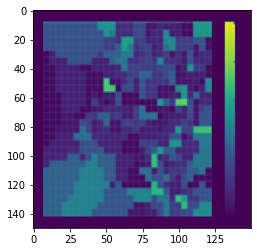

In [38]:
plt.imshow(ypred[21].reshape((150,150)))

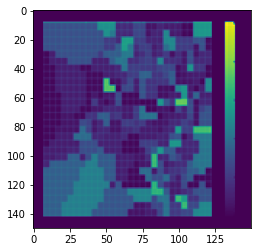

In [40]:
plt.imshow(test_y[21].reshape((150,150)))

In [41]:
model= tf.keras.models.Sequential()
model.add(layers.ConvLSTM2D(64,3,input_shape=(150,150,20,1),padding="same",activation="relu",return_sequences=True))
model.add(layers.BatchNormalization()) 

model.add(layers.ConvLSTM2D(32,3,padding="same",activation="relu",return_sequences=True))
model.add(layers.BatchNormalization()) 

model.add(layers.ConvLSTM2D(16,3,padding="same",activation="relu",return_sequences=False))
model.add(layers.BatchNormalization())  

model.add(layers.Conv2D(16,3,padding='same',activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(units=1024, activation='relu'))
model.add(layers.Dense(units=150*150))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 150, 150, 20, 64)  150016    
                                                                 
 batch_normalization_20 (Bat  (None, 150, 150, 20, 64)  256      
 chNormalization)                                                
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 150, 150, 20, 32)  110720    
                                                                 
 batch_normalization_21 (Bat  (None, 150, 150, 20, 32)  128      
 chNormalization)                                                
                                                                 
 conv_lstm2d_2 (ConvLSTM2D)  (None, 150, 20, 16)       27712     
                                                                 
 batch_normalization_22 (Bat  (None, 150, 20, 16)     

In [43]:
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(
    loss="mse",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["mse"],
)

In [44]:
epochs = 100
history=model.fit(
    x=train_x,y=train_y,batch_size=5,
#     validation_data=validation_dataset,
    epochs=epochs,
    shuffle=True,
    verbose=1,
#     callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/100
 18/116 [===>..........................] - ETA: 3:50:32 - loss: nan - mse: nan

KeyboardInterrupt: 

In [ ]:
ypred=model.predict(test_x,batch_size=15)

In [ ]:
from tensorflow.keras import metrics
np.mean(metrics.mse(test_y,ypred))

In [ ]:
plt.imshow(test_y[21].reshape((150,150)))

In [ ]:
plt.imshow(ypred[21].reshape((150,150)))

In [ ]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(train_x[0].shape))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 20
batch_size = 5

# Fit the model to the training data.
model.fit(
    training_x,
    training_y,
    batch_size=batch_size,
    epochs=epochs,
#     validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

In [ ]:
plt.imshow(ypred[21].reshape((150,150)))

Prepare the training and testing dataset

In [ ]:
training_x=[]
training_y=[]
window=20

for iter in range(0,589):
  print("Preparing training data ", iter)
  trining_data_temp=np.array(Image.open('./images/'+data.FileName[iter]))[:,:,1]
  for i in range(1,window):
    temp = np.array(Image.open('./images/'+data.FileName[i+iter]))[:,:,1]
    trining_data_temp=np.concatenate([temp,trining_data_temp],axis=1)

  training_x.append(trining_data_temp)
  training_y.append(np.array(Image.open('./images/'+data.FileName[i+1+iter]))[:,:,1])
  




In [ ]:

temp = np.array(Image.open('./images/prb-heat-map-1-2.png'))
temp1 = np.array(Image.open('./images/prb-heat-map-1-2.png'))

temp3=np.concatenate([temp,temp1],axis=2)
temp3.shape

In [ ]:
temp1.shape

In [ ]:
# the data  size is small 744, take 20% for test ing ~ 150 data points (image)
temp = Image.open('./images/prb-heat-map-1-2.png')
temp=np.array(temp)

In [ ]:
temp[:,:,3].shape

In [ ]:
plt.imshow(temp[:,:,:4])